# 数据处理03：Python数据分析库Pandas
Pandas 是最强大的 Python 数据分析库，它在 NumPy 基础之上构建，功能完善、性能出色并且操作便捷。项目官网 http://pandas.pydata.org/
![03_pandas.png](https://upload-images.jianshu.io/upload_images/10829283-cd5d3dfd9847679d.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

Pandas 已包含于 Anaconda 中，导入模块时请按惯例命名为 pd：

In [1]:
import pandas as pd
pd.__version__  # 查看版本号

'0.24.2'

Pandas 所提供的对象类型主要有“数据系列”（Series）和“数据网格”（DataFrame）——Series 像是一维数组而 DataFrame 像是二维数组，与数组的关键区别在于它们包含可自定义的“数据索引”（Index），类似于字典的键。DataFrame 中的列就是 Series 对象，每一列有各自的数据类型但共享相同的 Index。让我们先调用构造器创建一个 Series：

In [2]:
pd.Series(["北京", "上海", "广州", "深圳"])

0    北京
1    上海
2    广州
3    深圳
dtype: object

Series 对象的 index 属性指向所用的索引：

In [3]:
Out[2].index

RangeIndex(start=0, stop=4, step=1)

下面创建一个新的 Series 并使用城市名拼音缩写作为自定义索引：

In [4]:
cityname = pd.Series(["北京", "上海", "广州", "深圳"], index=["bj", "sh", "gz", "sz"])
cityname.index

Index(['bj', 'sh', 'gz', 'sz'], dtype='object')

需要注意的是默认的序列索引仍然有效：前者称为显式索引而后者称为隐式索引，当以整数作为显式索引时这可能会引发混淆，因此你还可以用“定位器”属性 loc 和 iloc 来明确指定索引方式：

In [5]:
cityname["sz"]

'深圳'

In [6]:
cityname[-1]

'深圳'

In [7]:
cityname.loc["bj"]

'北京'

In [8]:
cityname.iloc[0]

'北京'

下面让我们再尝试创建 DataFrame，所用方式是向构造器传入一个由可索引对象组成的字典，所生成 DataFrame 的列数据和列标签就是字典的值和键，行索引是一个由所有列数据共用的 Index，列索引则是一个由所有列标签组成的 Index：

In [9]:
citypop = {"bj": 1877.7, "sh": 2115, "gz": 1246.83, "sz": 1137.89}
df = pd.DataFrame({"名称": cityname, "人口": citypop})
df

,名称,人口
bj,北京,1877.70
gz,广州,1246.83
sh,上海,2115.00
sz,深圳,1137.89


In [10]:
df.index  # index属性指向行索引

Index(['bj', 'gz', 'sh', 'sz'], dtype='object')

In [11]:
df.columns  # columns属性指向列索引

Index(['名称', '人口'], dtype='object')

你可以使用 Series 与 DataFrame 的索引、属性或方法，以及模块的函数对数据执行各种操作，包括读取、更新和运算等等：

In [12]:
df["名称"]  # 以索引方式获取列

bj    北京
gz    广州
sh    上海
sz    深圳
Name: 名称, dtype: object

In [13]:
df.人口  # 以属性方式获取以标识符规则命名的列

bj    1877.70
gz    1246.83
sh    2115.00
sz    1137.89
Name: 人口, dtype: float64

In [14]:
df.iloc[2:]  # 以序列索引方式获取行

,名称,人口
sh,上海,2115.00
sz,深圳,1137.89


In [15]:
df["人口"].sum()  # 列数据求和

6377.42

In [16]:
df.sort_values("人口", ascending=False)  # 按人口列降序排列

,名称,人口
sh,上海,2115.00
bj,北京,1877.70
gz,广州,1246.83
sz,深圳,1137.89


注意方法和函数默认会返回新对象，索引操作则会在原地修改：

In [17]:
df["区号"] = ["010", "020", "021", "0755"]  # 添加新列
df

,名称,人口,区号
bj,北京,1877.70,010
gz,广州,1246.83,020
sh,上海,2115.00,021
sz,深圳,1137.89,0755


In [18]:
df.loc["tj"] = ["天津", 875.24, "022"]  # 添加新行
df

,名称,人口,区号
bj,北京,1877.70,010
gz,广州,1246.83,020
sh,上海,2115.00,021
sz,深圳,1137.89,0755
tj,天津,875.24,022


In [19]:
df[df.人口 >= 1000]  # 按条件筛选

,名称,人口,区号
bj,北京,1877.70,010
gz,广州,1246.83,020
sh,上海,2115.00,021
sz,深圳,1137.89,0755


In [20]:
df.人口 >= 1000  # 筛选的原理是用布尔值系列来索引

bj     True
gz     True
sh     True
sz     True
tj    False
Name: 人口, dtype: bool

In [21]:
df2 = pd.DataFrame([["重庆", 851.8, "023"], ["南京", 617.82, "025"]], columns=["名称", "人口", "区号"], index=["cq", "nj"])
pd.concat([df, df2])  # 拼接两个 DataFrame

,名称,人口,区号
bj,北京,1877.70,010
gz,广州,1246.83,020
sh,上海,2115.00,021
sz,深圳,1137.89,0755
tj,天津,875.24,022
cq,重庆,851.80,023
nj,南京,617.82,025


接下来的例子是对中国历史上皇帝们的寿命进行统计分析，这次使用现成数据来生成 DataFrame。Pandas 支持读取多种类型的资源，例如以逗号作为分隔符的文本格式（CSV）：

In [22]:
# 短网址对应的原文件
# https://gitee.com/freesand/pyStudy/raw/master/data/emperor.csv
# df = pd.read_csv("http://t.cn/EMl0NtB")
df = pd.read_csv("emperor.csv")
print("数据网格形状：", df.shape)
print("各列数据类型：")
print(df.dtypes)

数据网格形状： (302, 5)
各列数据类型：
num         int64
name       object
age         int64
year       object
dynasty    object
dtype: object


对于大尺寸 DataFrame，推荐先用 shape 和 dtypes 属性查看形状和列数据类型，也可用 head() 方法预览前 5 行内容，DataFrame 在 Jupyter Notebook 中会以表格形式输出：

In [23]:
df.head()

,num,name,age,year,dynasty
0,1,秦始皇嬴政,50,前259年—前210年,秦
1,2,秦二世嬴胡亥,24,前230年—前207年,秦
2,3,汉高帝刘邦,62,前256年—前195年,西汉
3,4,汉惠帝刘盈,23,前210年—前188年,西汉
4,5,汉文帝刘恒,46,前202年—前157年,西汉


对于已生成的 DataFrame，还可以进行一些调整操作（修改列标签、去除多余内容等）再开始数据分析，例如列出寿命达到 80 岁的皇帝：

In [24]:
df.columns = ["序号", "名号", "寿命", "生卒", "朝代"]
df[df.寿命 >= 80]

,序号,名号,寿命,生卒,朝代
100,100,梁武帝萧衍,86,464年—549年,南朝梁
149,149,武则天武瞾,82,624年—705年,唐
208,207,宋高宗赵构,81,1107年—1187年,南宋
253,252,元世祖孛儿只斤·忽必烈,80,1215年—1294年,元
295,296,清高宗（乾隆）爱新觉罗·弘历,89,1711年—1799年,清


筛选出明清两朝的皇帝：

In [25]:
mingqing = df[df.朝代.isin(["明", "清"])]
mingqing.head()

,序号,名号,寿命,生卒,朝代
267,266,明太祖（洪武）朱元璋,71,1328年—1398年,明
268,267,明惠宗（建文）朱允炆,26,1377年—1402年,明
269,268,明成祖（永乐）朱棣,65,1360年—1424年,明
270,269,明仁宗（洪熙）朱高炽,48,1378年—1425年,明
271,270,明宣宗（宣德）朱瞻基,38,1398年—1435年,明


比较明清两朝的皇帝寿命——聚合输出分组总计数、最低值、最高值、平均值、中位数：

In [26]:
compare = mingqing.groupby("朝代").寿命.agg(["count", "min", "max", "mean", "median"])
compare

,count,min,max,mean,median
朝代,,,,,
明,16,23,71,42.187500,38.0
清,12,19,89,53.333333,59.5


还可以根据全体皇帝的寿命数据绘制直方图来显示值的分布：

(array([10., 25., 48., 62., 56., 49., 36., 11.,  5.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

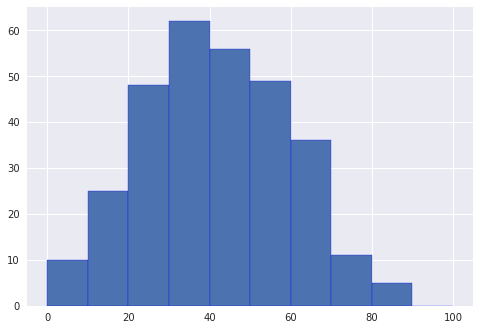

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.hist(df.寿命, range=(0, 100), edgecolor="blue")  # 直方图，范围0至100（默认为最小值到最大值）

Pandas 的功能非常丰富，想更深入地了解请查看官方文档 http://pandas.pydata.org/pandas-docs/stable/

——编程原来是这样……